# EDA with help of pyspark

In [2]:

from pyspark import SparkContext                                    
from pyspark.sql import SparkSession, Window, Row                  
from pyspark.sql import functions as F                              
from pyspark.sql.functions import col, isnan, when, count           
from pyspark.sql.functions import *                                 
from pyspark.sql.types import *                                     

import matplotlib.pyplot as plt                                     
%matplotlib inline                                                  
import seaborn as sns                                               
from handyspark import *                                            

from pyspark.ml.feature import VectorAssembler 

In [4]:
# Building a spark app/session
spark = SparkSession.builder.appName("restaurantapp").getOrCreate()

# single cluster information
spark

In [8]:
# loading the dataset 
df = spark.read.csv('zomato.csv', header=True, inferSchema="true")

In [11]:
df.show(n=5, truncate=False, vertical=True)

-RECORD 0---------------------------------------------------------------------------------------
 Restaurant ID        | 6317637                                                                 
 Restaurant Name      | Le Petit Souffle                                                        
 Country Code         | 162                                                                     
 City                 | Makati City                                                             
 Address              | Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City 
 Locality             | Century City Mall, Poblacion, Makati City                               
 Locality Verbose     | Century City Mall, Poblacion, Makati City, Makati City                  
 Longitude            | 121.027535                                                              
 Latitude             | 14.565443                                                               
 Cuisines             | French

In [13]:
# Description of dataset
df.describe().show(n=5, truncate=False, vertical=True)

-RECORD 0------------------------------------------------------------------------------------
 summary              | count                                                                
 Restaurant ID        | 9557                                                                 
 Restaurant Name      | 9557                                                                 
 Country Code         | 9557                                                                 
 City                 | 9557                                                                 
 Address              | 9557                                                                 
 Locality             | 9551                                                                 
 Locality Verbose     | 9551                                                                 
 Longitude            | 9551                                                                 
 Latitude             | 9551                                

In [14]:
df.printSchema()

root
 |-- Restaurant ID: string (nullable = true)
 |-- Restaurant Name: string (nullable = true)
 |-- Country Code: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Locality: string (nullable = true)
 |-- Locality Verbose: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Cuisines: string (nullable = true)
 |-- Average Cost for two: string (nullable = true)
 |-- Currency: string (nullable = true)
 |-- Has Table booking: string (nullable = true)
 |-- Has Online delivery: string (nullable = true)
 |-- Is delivering now: string (nullable = true)
 |-- Switch to order menu: string (nullable = true)
 |-- Price range: string (nullable = true)
 |-- Aggregate rating: string (nullable = true)
 |-- Rating color: string (nullable = true)
 |-- Rating text: string (nullable = true)
 |-- Votes: integer (nullable = true)



In [16]:
# Displaying the values of a particular column
df.select('Restaurant Name').show()

+--------------------+
|     Restaurant Name|
+--------------------+
|    Le Petit Souffle|
|    Izakaya Kikufuji|
|Heat - Edsa Shang...|
|                Ooma|
|         Sambo Kojin|
|        Din Tai Fung|
|          Buffet 101|
|             Vikings|
|Spiral - Sofitel ...|
|            Locavore|
|    Silantro Fil-Mex|
|Mad Mark's Creame...|
|    Silantro Fil-Mex|
|          Guevarra's|
|Sodam Korean Rest...|
|       Cafe Arabelle|
|Nonna's Pasta & P...|
|          Balay Dako|
|Hobing Korean Des...|
|Wildflour Cafe + ...|
+--------------------+
only showing top 20 rows



In [18]:
# Converting to handyspark dataframe
hdf = df.toHandy()
hdf.show()

C:\Users\arjun\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\sql\dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
C:\Users\arjun\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\sql\dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+-------------+--------------------+------------+----------------+--------------------+--------------------+--------------------+-----------+-----------+--------------------+--------------------+----------------+-----------------+-------------------+-----------------+--------------------+-----------+----------------+------------+-----------+-----+
|Restaurant ID|     Restaurant Name|Country Code|            City|             Address|            Locality|    Locality Verbose|  Longitude|   Latitude|            Cuisines|Average Cost for two|        Currency|Has Table booking|Has Online delivery|Is delivering now|Switch to order menu|Price range|Aggregate rating|Rating color|Rating text|Votes|
+-------------+--------------------+------------+----------------+--------------------+--------------------+--------------------+-----------+-----------+--------------------+--------------------+----------------+-----------------+-------------------+-----------------+--------------------+-----------

C:\Users\arjun\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\sql\dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
C:\Users\arjun\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\sql\dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


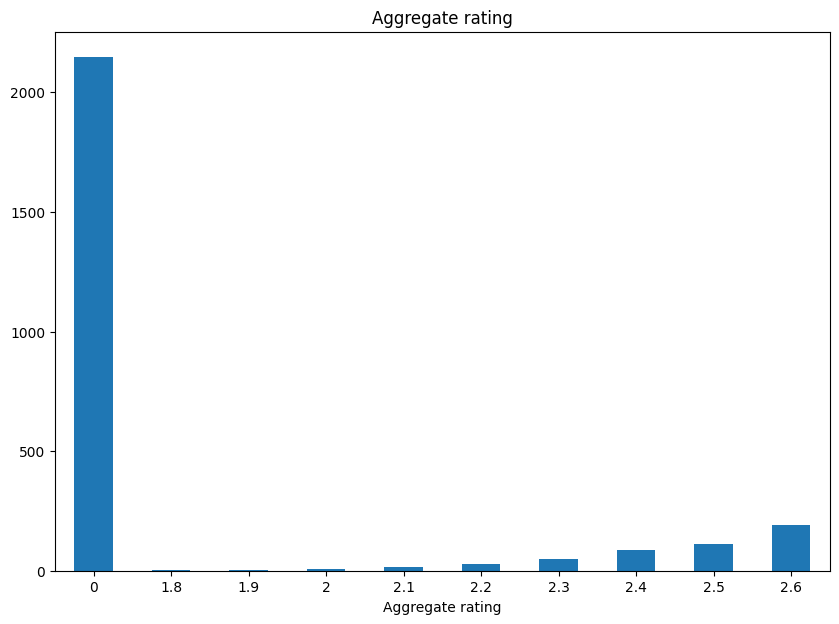

In [23]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols['Aggregate rating'].hist(ax=ax)
plt.show()